In [1]:
# Non-negative least squares

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
np.random.seed(42)

In [4]:
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)

In [5]:
X.shape

(200, 50)

In [8]:
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

In [9]:
y.shape

(200,)

In [11]:
# split the train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [12]:
X_train.shape

(100, 50)

In [13]:
X_test.shape

(100, 50)

In [14]:
# Fit the Non-Negative least squares.

from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8308834398297879


In [16]:
# Fit an OLS
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.8032597616164006


Text(0, 0.5, 'NNLS regression coefficients')

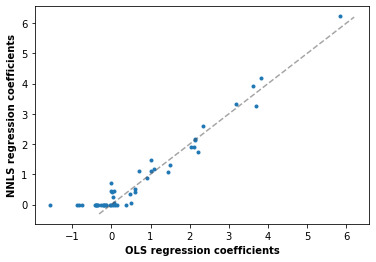

In [17]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")